In [1]:
###packages and parameters
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from pandas_market_calendars import get_calendar

polygon_api_key = "KkfCQ7fsZnx0yK4bhX9fD81QplTh0Pf3"
calendar = get_calendar("NYSE")

###get your tickers
spx_index = "I:SPX"
vix_index = "I:VIX1D"
spx_ticker = "SPX"

trading_dates = calendar.schedule(start_date = "2023-05-01", end_date = (datetime.today()-timedelta(days = 1))).index.strftime("%Y-%m-%d").values
# trading_dates = trading_dates[0:5]
trading_dates



array(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
       '2023-05-05', '2023-05-08', '2023-05-09', '2023-05-10',
       '2023-05-11', '2023-05-12', '2023-05-15', '2023-05-16',
       '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
       '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
       '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
       '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
       '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
       '2023-06-15', '2023-06-16', '2023-06-20', '2023-06-21',
       '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-03',
       '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-10',
       '2023-07-11', '2023-07-12', '2023-07-13', '2023-07-14',
       '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
       '2023-07-21', '2023-07-24', '2023-07-25', '2023-07-26',
       '2023-07-27', '2023-07-28', '2023-07-31', '2023-

In [2]:
###load in vix open each day
vix_data = pd.DataFrame.from_dict({'open': pd.Series(dtype='float64')})


###pull the vix data each day
for date in trading_dates[1:]:
    try:
        start_time = datetime.now()
        
        prior_day = trading_dates[np.where(trading_dates==date)[0][0]-1]

        vix = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{vix_index}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=50000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
        vix.index = pd.to_datetime(vix.index, unit="ms", utc=True).tz_convert("America/New_York")
        #rename columns
        vix = vix.rename(columns={"o": "open", "h": "high", "l": "low", "c": "close"})
        ###take the first row of the df
        vix = vix.iloc[0:1]
        vix = vix['open']
        vix_data = pd.concat([vix_data, vix])
    except Exception as data_error:
        print(data_error)
        continue
vix_data

C:\Users\dbuch\AppData\Local\Temp\ipykernel_26068\3137260197.py:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vix_data = pd.concat([vix_data, vix])


'results'


,open
2023-05-02 09:31:00-04:00,9.34
2023-05-03 09:31:00-04:00,19.37
2023-05-04 09:31:00-04:00,15.09
2023-05-05 09:31:00-04:00,13.02
2023-05-08 09:31:00-04:00,10.14
...,...
2024-07-09 09:31:00-04:00,7.12
2024-07-10 09:31:00-04:00,6.72
2024-07-11 09:31:00-04:00,8.99
2024-07-12 09:31:00-04:00,8.43


In [3]:
####if vix at or under 15, sell and buy spx options 2% otm as of 9:35am EST, close out at 3:57pm EST
vix_data['under_15_flag'] = np.where(vix_data['open'] <= 15, 1, 0)

###pull the spx price each day
spx_data = pd.DataFrame.from_dict({'open': pd.Series(dtype='float64')})

###pull the spx data each day
for date in trading_dates[1:]:
    try:
        start_time = datetime.now()
        
        prior_day = trading_dates[np.where(trading_dates==date)[0][0]-1]

        spx = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{spx_index}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=50000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
        spx.index = pd.to_datetime(spx.index, unit="ms", utc=True).tz_convert("America/New_York")
        #rename columns
        spx = spx.rename(columns={"o": "open", "h": "high", "l": "low", "c": "close"})
        ###take the ending in 09:35:00-04:00
        spx = spx.between_time("09:35:00", "09:35:00")
        spx = spx['open']
        spx_data = pd.concat([spx_data, spx])
    except Exception as data_error:
        print(data_error)
        continue
spx_data

C:\Users\dbuch\AppData\Local\Temp\ipykernel_26068\3095039042.py:21: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  spx_data = pd.concat([spx_data, spx])


'results'


,open
2023-05-02 09:35:00-04:00,4153.82
2023-05-03 09:35:00-04:00,4125.61
2023-05-04 09:35:00-04:00,4081.50
2023-05-05 09:35:00-04:00,4105.45
2023-05-08 09:35:00-04:00,4135.90
...,...
2024-07-09 09:35:00-04:00,5586.25
2024-07-10 09:35:00-04:00,5589.80
2024-07-11 09:35:00-04:00,5634.33
2024-07-12 09:35:00-04:00,5593.02


In [4]:
###get 2% up and down strikes rounded to the nearest 5
###this is too far: looking at the data, this won't outpace fees
spx_data['2%_up'] = (np.ceil(spx_data['open']*1.02/5)*5).astype(int)
spx_data['2%_down'] = (np.floor(spx_data['open']*0.98/5)*5).astype(int)  
spx_data

,open,2%_up,2%_down
2023-05-02 09:35:00-04:00,4153.82,4240,4070
2023-05-03 09:35:00-04:00,4125.61,4210,4040
2023-05-04 09:35:00-04:00,4081.50,4165,3995
2023-05-05 09:35:00-04:00,4105.45,4190,4020
2023-05-08 09:35:00-04:00,4135.90,4220,4050
...,...,...,...
2024-07-09 09:35:00-04:00,5586.25,5700,5470
2024-07-10 09:35:00-04:00,5589.80,5705,5475
2024-07-11 09:35:00-04:00,5634.33,5750,5520
2024-07-12 09:35:00-04:00,5593.02,5705,5480


In [5]:
####prove it by pulling the options associated with the spx price
def format_option_ticker(row, type='call', column_name = '2%_up'):

    date_str = row.name.strftime('%y%m%d')  # Access the index (date) and format it
    if type == 'call':
        ticker = f"O:SPXW{date_str}C{int(row[column_name]*1000):08d}"
    if type == 'put':
        ticker = f"O:SPXW{date_str}P{int(row[column_name]*1000):08d}"

    return ticker

# Apply the function to create the new column

spx_data['short_call'] = spx_data.apply(format_option_ticker, column_name = '2%_up', type='call', axis=1)
spx_data['short_put'] = spx_data.apply(format_option_ticker, column_name = '2%_down', type='put', axis=1)

spx_data

,open,2%_up,2%_down,short_call,short_put
2023-05-02 09:35:00-04:00,4153.82,4240,4070,O:SPXW230502C04240000,O:SPXW230502P04070000
2023-05-03 09:35:00-04:00,4125.61,4210,4040,O:SPXW230503C04210000,O:SPXW230503P04040000
2023-05-04 09:35:00-04:00,4081.50,4165,3995,O:SPXW230504C04165000,O:SPXW230504P03995000
2023-05-05 09:35:00-04:00,4105.45,4190,4020,O:SPXW230505C04190000,O:SPXW230505P04020000
2023-05-08 09:35:00-04:00,4135.90,4220,4050,O:SPXW230508C04220000,O:SPXW230508P04050000
...,...,...,...,...,...
2024-07-09 09:35:00-04:00,5586.25,5700,5470,O:SPXW240709C05700000,O:SPXW240709P05470000
2024-07-10 09:35:00-04:00,5589.80,5705,5475,O:SPXW240710C05705000,O:SPXW240710P05475000
2024-07-11 09:35:00-04:00,5634.33,5750,5520,O:SPXW240711C05750000,O:SPXW240711P05520000
2024-07-12 09:35:00-04:00,5593.02,5705,5480,O:SPXW240712C05705000,O:SPXW240712P05480000


In [6]:
###illiquid market and I'm not selling an option for 5 cents
short_call_ohlcv = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{spx_data['short_call'].iloc[0]}/range/5/minute/2023-05-02/2023-05-02?adjusted=true&sort=asc&limit=1000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
short_call_ohlcv.index = pd.to_datetime(short_call_ohlcv.index, unit = "ms", utc = True).tz_convert("America/New_York") 
short_call_ohlcv

,v,vw,o,c,h,l,n
t,,,,,,,
2023-05-02 09:30:00-04:00,267,0.05,0.05,0.05,0.05,0.05,45
2023-05-02 09:35:00-04:00,5,0.05,0.05,0.05,0.05,0.05,2
2023-05-02 09:40:00-04:00,1,0.05,0.05,0.05,0.05,0.05,1
2023-05-02 09:55:00-04:00,1,0.05,0.05,0.05,0.05,0.05,1
2023-05-02 10:05:00-04:00,2,0.05,0.05,0.05,0.05,0.05,1
2023-05-02 10:10:00-04:00,13,0.05,0.05,0.05,0.05,0.05,1
2023-05-02 10:15:00-04:00,1,0.05,0.05,0.05,0.05,0.05,1
2023-05-02 10:20:00-04:00,3,0.05,0.05,0.05,0.05,0.05,3
2023-05-02 10:25:00-04:00,8,0.05,0.05,0.05,0.05,0.05,1


#### Try 0.5% should be a better risk vs reward- and make it a spread

In [7]:
spx_data['short_call'] = (np.ceil(spx_data['open']*1.005/5)*5).astype(int)
spx_data['long_call'] = spx_data['short_call'] + 5
spx_data['short_put'] = (np.floor(spx_data['open']*0.995/5)*5).astype(int)  
spx_data['long_put'] = spx_data['short_put'] - 5

###format the tickers
spx_data['short_call_ticker'] = spx_data.apply(format_option_ticker, type='call', column_name = 'short_call', axis=1)
spx_data['long_call_ticker'] = spx_data.apply(format_option_ticker, type='call', column_name = 'long_call', axis=1)

spx_data['short_put_ticker'] = spx_data.apply(format_option_ticker, type='put', column_name = 'short_put', axis=1)
spx_data['long_put_ticker'] = spx_data.apply(format_option_ticker, type='put', column_name = 'long_put', axis=1)

spx_data['date'] = spx_data.index.strftime('%Y-%m-%d')
spx_data

,open,2%_up,2%_down,short_call,short_put,long_call,long_put,short_call_ticker,long_call_ticker,short_put_ticker,long_put_ticker,date
2023-05-02 09:35:00-04:00,4153.82,4240,4070,4175,4130,4180,4125,O:SPXW230502C04175000,O:SPXW230502C04180000,O:SPXW230502P04130000,O:SPXW230502P04125000,2023-05-02
2023-05-03 09:35:00-04:00,4125.61,4210,4040,4150,4100,4155,4095,O:SPXW230503C04150000,O:SPXW230503C04155000,O:SPXW230503P04100000,O:SPXW230503P04095000,2023-05-03
2023-05-04 09:35:00-04:00,4081.50,4165,3995,4105,4060,4110,4055,O:SPXW230504C04105000,O:SPXW230504C04110000,O:SPXW230504P04060000,O:SPXW230504P04055000,2023-05-04
2023-05-05 09:35:00-04:00,4105.45,4190,4020,4130,4080,4135,4075,O:SPXW230505C04130000,O:SPXW230505C04135000,O:SPXW230505P04080000,O:SPXW230505P04075000,2023-05-05
2023-05-08 09:35:00-04:00,4135.90,4220,4050,4160,4115,4165,4110,O:SPXW230508C04160000,O:SPXW230508C04165000,O:SPXW230508P04115000,O:SPXW230508P04110000,2023-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-09 09:35:00-04:00,5586.25,5700,5470,5615,5555,5620,5550,O:SPXW240709C05615000,O:SPXW240709C05620000,O:SPXW240709P05555000,O:SPXW240709P05550000,2024-07-09
2024-07-10 09:35:00-04:00,5589.80,5705,5475,5620,5560,5625,5555,O:SPXW240710C05620000,O:SPXW240710C05625000,O:SPXW240710P05560000,O:SPXW240710P05555000,2024-07-10
2024-07-11 09:35:00-04:00,5634.33,5750,5520,5665,5605,5670,5600,O:SPXW240711C05665000,O:SPXW240711C05670000,O:SPXW240711P05605000,O:SPXW240711P05600000,2024-07-11
2024-07-12 09:35:00-04:00,5593.02,5705,5480,5625,5565,5630,5560,O:SPXW240712C05625000,O:SPXW240712C05630000,O:SPXW240712P05565000,O:SPXW240712P05560000,2024-07-12


In [8]:
####get dates where the vix is at or under 15 and sell the iron condor both days

low_vix_dates = vix_data[vix_data['under_15_flag'] == 1].index.strftime("%Y-%m-%d").values

trade_list = []


for date in low_vix_dates:
    my_short_call = spx_data.loc[spx_data['date'] == date, 'short_call_ticker'].values[0]
    my_long_call = spx_data.loc[spx_data['date'] == date, 'long_call_ticker'].values[0]

    my_short_put = spx_data.loc[spx_data['date'] == date, 'short_put_ticker'].values[0]
    my_long_put = spx_data.loc[spx_data['date'] == date, 'long_put_ticker'].values[0]

    ###now that we have our tickers, copy the spread code from quant galore  
    ###get the value of the short call spread each day  
    short_call_ohlcv = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{my_short_call}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=1000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
    short_call_ohlcv.index = pd.to_datetime(short_call_ohlcv.index, unit = "ms", utc = True).tz_convert("America/New_York") 
    
    long_call_ohlcv = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{my_long_call}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=1000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
    long_call_ohlcv.index = pd.to_datetime(long_call_ohlcv.index, unit = "ms", utc = True).tz_convert("America/New_York") 
    
    short_call_spread = pd.concat([short_call_ohlcv.add_prefix("short_call_"), long_call_ohlcv.add_prefix("long_call_")], axis = 1).dropna()
    short_call_spread = short_call_spread[short_call_spread.index.time >= pd.Timestamp("09:35").time()].copy()
    short_call_spread["spread_value"] = short_call_spread["short_call_c"] - short_call_spread["long_call_c"]
    short_call_cost = short_call_spread["spread_value"].iloc[0]
    
    ###get the value of the short put spread each day  
    short_put_ohlcv = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{my_short_put}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=1000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
    short_put_ohlcv.index = pd.to_datetime(short_put_ohlcv.index, unit = "ms", utc = True).tz_convert("America/New_York")   
    
    long_put_ohlcv = pd.json_normalize(requests.get(f"https://api.polygon.io/v2/aggs/ticker/{my_long_put}/range/1/minute/{date}/{date}?adjusted=true&sort=asc&limit=1000&apiKey={polygon_api_key}").json()["results"]).set_index("t")
    long_put_ohlcv.index = pd.to_datetime(long_put_ohlcv.index, unit = "ms", utc = True).tz_convert("America/New_York")

    short_put_spread = pd.concat([short_call_ohlcv.add_prefix("short_put_"), long_call_ohlcv.add_prefix("long_put_")], axis = 1).dropna()
    short_put_spread = short_put_spread[short_put_spread.index.time >= pd.Timestamp("09:35").time()].copy()
    short_put_spread["spread_value"] = short_put_spread["short_put_c"] - short_put_spread["long_put_c"]
    short_put_cost = short_put_spread["spread_value"].iloc[0]

    final_value = short_put_spread["spread_value"].iloc[-1] + short_call_spread["spread_value"].iloc[-1]
    gross_pnl = (short_call_cost + short_put_cost) - final_value
    gross_pnl_percent = round((gross_pnl / (short_call_cost + short_put_cost)) * 100, 2)

    trade_data = pd.DataFrame([{"date": date, "cost": (short_put_cost + short_call_cost), "final_price": final_value, "gross_pnl": gross_pnl, "gross_pnl_percent": gross_pnl_percent, "ticker": 'I:SPX', "direction": 'iron_condor_low_vol'}])

    trade_list.append(trade_data)




In [9]:
all_trades = pd.concat(trade_list).drop_duplicates("date").set_index("date")
all_trades.index = pd.to_datetime(all_trades.index).tz_localize("America/New_York")

all_trades["max_loss"] = (5 - all_trades["cost"])
all_trades['gross_pnl'] = all_trades.apply(lambda row: row['max_loss']*-1 if (row['gross_pnl'] < row['max_loss']*-1) else row["gross_pnl"], axis=1)

all_trades["contracts"] = (5 / all_trades["max_loss"]).astype(int)
all_trades["max_loss"] = (all_trades["max_loss"]) * all_trades["contracts"]
all_trades["fees"] = all_trades["contracts"] * .07
all_trades["net_pnl"] = (all_trades["gross_pnl"] * all_trades["contracts"]) - all_trades["fees"]

all_trades["net_capital"] = 2000 + (all_trades["net_pnl"]*100).cumsum()


In [10]:
len(low_vix_dates)

289

In [11]:
all_trades.sort_values(by='gross_pnl')

,cost,final_price,gross_pnl,gross_pnl_percent,ticker,direction,max_loss,contracts,fees,net_pnl,net_capital
date,,,,,,,,,,,
2023-11-20 00:00:00-05:00,0.40,7.50,-4.60,-1775.00,I:SPX,iron_condor_low_vol,4.60,1,0.07,-4.67,10751.0
2023-07-18 00:00:00-04:00,0.50,15.20,-4.50,-2940.00,I:SPX,iron_condor_low_vol,4.50,1,0.07,-4.57,2786.0
2024-06-17 00:00:00-04:00,0.60,8.74,-4.40,-1356.67,I:SPX,iron_condor_low_vol,4.40,1,0.07,-4.47,14053.0
2024-01-08 00:00:00-05:00,0.80,10.96,-4.20,-1270.00,I:SPX,iron_condor_low_vol,4.20,1,0.07,-4.27,11094.0
2024-07-02 00:00:00-04:00,0.84,10.20,-4.16,-1114.29,I:SPX,iron_condor_low_vol,4.16,1,0.07,-4.23,14465.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,2.80,0.30,2.50,89.29,I:SPX,iron_condor_low_vol,4.40,2,0.14,4.86,13857.0
2023-10-19 00:00:00-04:00,2.60,0.00,2.60,100.00,I:SPX,iron_condor_low_vol,4.80,2,0.14,5.06,9980.0
2023-10-05 00:00:00-04:00,2.60,0.00,2.60,100.00,I:SPX,iron_condor_low_vol,4.80,2,0.14,5.06,9106.0


In [12]:
monthly = all_trades.resample("M").sum(numeric_only=True)

total_return = round(((all_trades["net_capital"].iloc[-1] - 2000) / 2000)*100, 2)
sd = round(all_trades["gross_pnl_percent"].std(), 2)

wins = all_trades[all_trades["net_pnl"] > 0]
losses = all_trades[all_trades["net_pnl"] < 0]

avg_win = wins["net_pnl"].mean()
avg_loss = losses["net_pnl"].mean()

win_rate = round(len(wins) / len(all_trades), 2)

expected_value = round((win_rate * avg_win) + ((1-win_rate) * avg_loss), 2)


C:\Users\dbuch\AppData\Local\Temp\ipykernel_26068\638942986.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = all_trades.resample("M").sum(numeric_only=True)


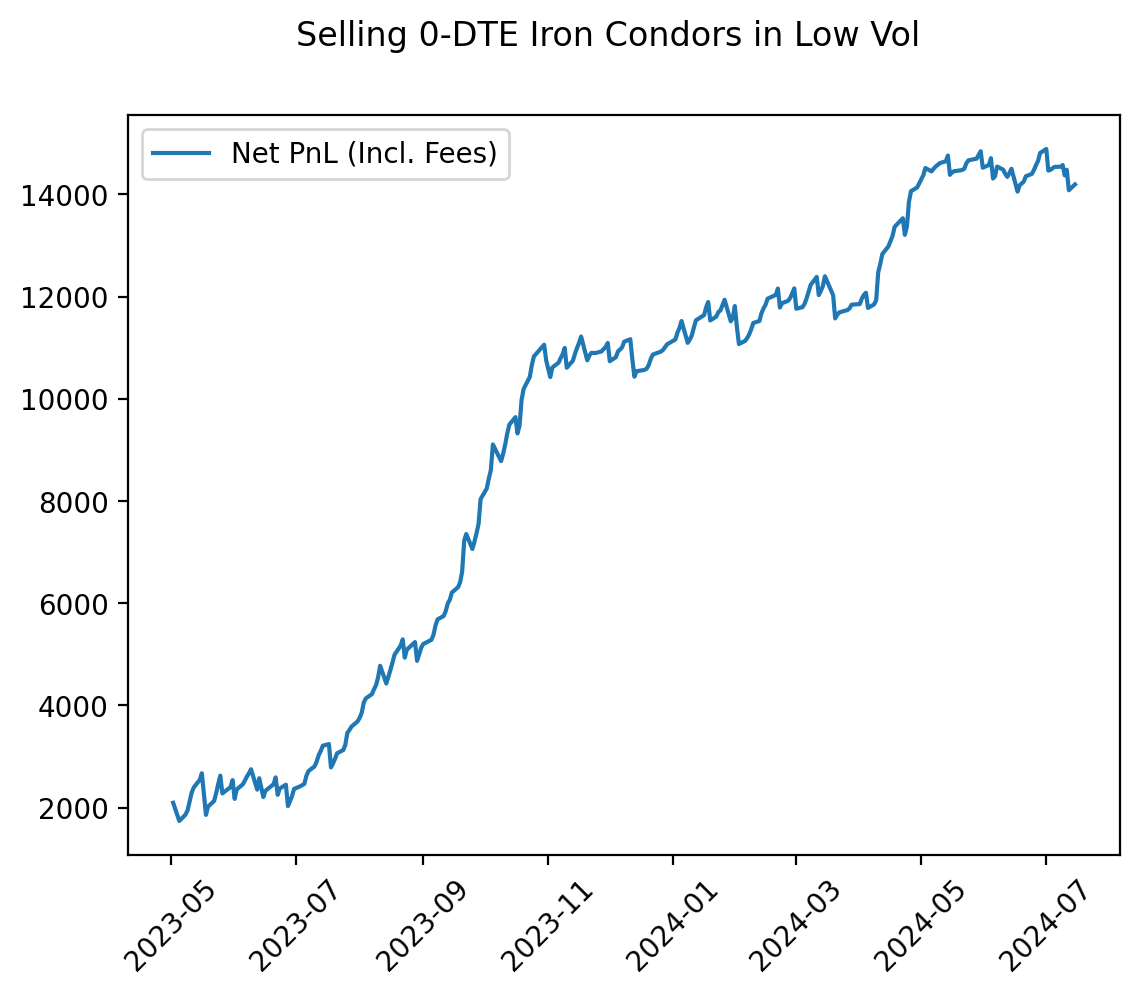

EV per trade: $43.0
Win Rate: 84.0%
Avg Profit: $115.77
Avg Loss: $-336.66
Total Profit: $12193.0


In [13]:
plt.figure(dpi=200)
plt.xticks(rotation=45)
plt.suptitle("Selling 0-DTE Iron Condors in Low Vol")
plt.plot(all_trades.index, all_trades["net_capital"])
plt.legend(["Net PnL (Incl. Fees)"])
plt.show()

print(f"EV per trade: ${expected_value*100}")
print(f"Win Rate: {win_rate*100}%")
print(f"Avg Profit: ${round(avg_win*100,2)}")
print(f"Avg Loss: ${round(avg_loss*100,2)}")
print(f"Total Profit: ${all_trades['net_pnl'].sum()*100}")

In [14]:
spread

NameError: name 'spread' is not defined

In [ ]:
cost

0.6000000000000001